In [1]:
from q_table import *
from grid_world import *

from time import process_time

t = process_time()

# Define the learning parameters
learning_rate = 0.15
discount_factor = 0.998
num_episodes = 16000
max_steps = 100 
epsilon_initial = 1.0
epsilon_final = 0.1
epsilon_decay = 0.99998 
# Define the grid world dimensions
n = 5
m = 5

num_agents = 4

# # Define the number of actions (up, down, left, right)
# num_actions = 4

collisions_lst = []
cycles_lst = []
rewards_lst = []
epsilon_lst = []
epsilon = epsilon_initial
total_steps = 0
total_collisions = 0
total_cycles = 0
a_b = 0

q_table = init_q_table(n,m)

# for i in range(num_episodes+1):
    
#     loc_a = (rd.randint(0,n-1), rd.randint(0,m-1))
#     loc_b = (rd.randint(0,n-1), rd.randint(0,m-1))

#     # loc_a = (0,3)
#     # loc_b = (3,4)

#     # ensuring loc_b and loc_a aren't equal
#     while loc_b == loc_a:
#         loc_b = rd.randint(0,n-1), rd.randint(0,m-1)
    
#     loc_as.append(loc_a)
#     loc_bs.append(loc_b)
#     agents = init_agents( num_agents, loc_a, loc_b )
#     agents_each_epoch.append( agents )
#     # agents_each_epoch.append( init_agents_random( n, m, num_agents, loc_a ) )

#     gws.append( GridWorld(n, m, loc_a, loc_b, agents) )

for i in range(num_episodes+1):

    loc_a = (rd.randint(0,n-1), rd.randint(0,m-1))
    loc_b = (rd.randint(0,n-1), rd.randint(0,m-1))

    while loc_b == loc_a:
        loc_b = rd.randint(0,n-1), rd.randint(0,m-1)

    agents = init_agents(num_agents, loc_a, loc_b)
    gw = GridWorld(n,m,loc_a, loc_b,agents)

    num_steps = 0
    reward_per_episode =  0
    collisions_ep = 0
    cycles_ep = 0

    while (num_steps < max_steps) :

        # rd shuffle

        for agent in agents:

            state = gw.get_np_state_for_agent(agent).reshape(1, statespace_size)
            state = tuple( state.tolist()[0] )
            action_ = choose_action(q_table, state, epsilon)
            action = action_set[action_]
            reward = gw.attempt_action_for_agent(agent, action)
            next_state = gw.get_np_state_for_agent(agent)
            reward_per_episode += reward

            done = (agent.num_collisions > 0)

            # print(state)
            # print()

            update_q(q_table, state, action_, next_state, reward, learning_rate, discount_factor, done)

            num_steps += 1
        
        epsilon_lst.append(epsilon)
        epsilon = np.max([epsilon_final, epsilon*epsilon_decay])

    collisions_ep = sum([agent.num_collisions for agent in agents])
    collisions_lst.append(collisions_ep)
    total_collisions += collisions_ep

    cycles_ep = sum([agent.cycles for agent in agents])
    cycles_lst.append(cycles_ep)
    total_cycles += cycles_ep

    rewards_lst.append(reward_per_episode)

    total_steps += num_steps

    if ( i % 1000 == 0 ):
        print(f"episodes: {i} steps: {total_steps} collisions: {total_collisions} cycles: {total_cycles} eps: {epsilon}")
    
elapsed_time = process_time() - t

print(num_steps)

print("Finished in ", elapsed_time, "seconds")




episodes: 0 steps: 100 collisions: 3 cycles: 3 eps: 0.9995001199816015
episodes: 1000 steps: 100100 collisions: 3135 cycles: 2537 eps: 0.6062244359848239
episodes: 2000 steps: 200100 collisions: 5384 cycles: 5351 eps: 0.36769186860315906
episodes: 3000 steps: 300100 collisions: 7071 cycles: 8242 eps: 0.2230152765406961
episodes: 4000 steps: 400100 collisions: 8016 cycles: 10501 eps: 0.1352649264708136
episodes: 5000 steps: 500100 collisions: 8692 cycles: 13491 eps: 0.1
episodes: 6000 steps: 600100 collisions: 9207 cycles: 16311 eps: 0.1
episodes: 7000 steps: 700100 collisions: 9782 cycles: 19609 eps: 0.1
episodes: 8000 steps: 800100 collisions: 10352 cycles: 22690 eps: 0.1
episodes: 9000 steps: 900100 collisions: 10869 cycles: 25407 eps: 0.1
episodes: 10000 steps: 1000100 collisions: 11400 cycles: 28167 eps: 0.1
episodes: 11000 steps: 1100100 collisions: 11809 cycles: 30887 eps: 0.1
episodes: 12000 steps: 1200100 collisions: 12286 cycles: 33539 eps: 0.1
episodes: 13000 steps: 1300100 c

In [2]:
print(f"episodes: {i} steps: {total_steps} collisions: {total_collisions} cycles: {total_cycles} eps: {epsilon}")

episodes: 16000 steps: 1600100 collisions: 14045 cycles: 44559 eps: 0.1


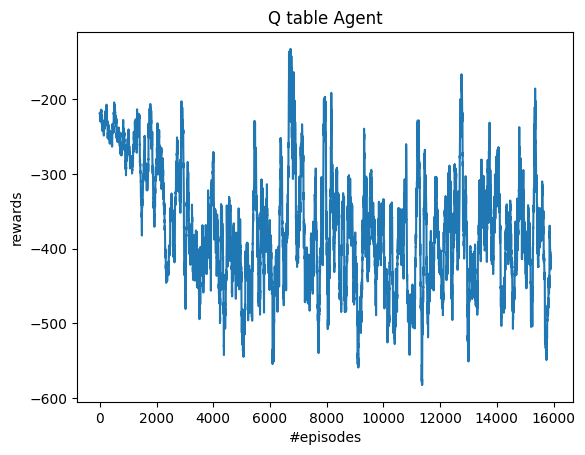

In [5]:
def movingAverage(arr, window_size):
    i = 0
    moving_averages = []
    while i < len(arr) - window_size + 1:
        window_average = round(np.sum(arr[i:i+window_size]) / window_size, 2)
        moving_averages.append(window_average)
        i += 1
    return moving_averages

import matplotlib.pyplot as plt
plt.plot(movingAverage(rewards_lst,100))
# Add x and y axis labels
plt.xlabel("#episodes")
plt.ylabel("rewards")
plt.title("Q table Agent")
# Show the plot
plt.show()

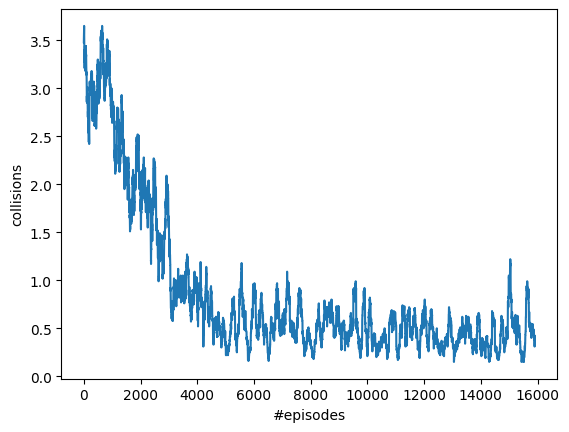

In [4]:
plt.plot(movingAverage(collisions_lst,100))
# Add x and y axis labels
plt.xlabel("#episodes")
plt.ylabel("collisions")
# Show the plot
plt.show()

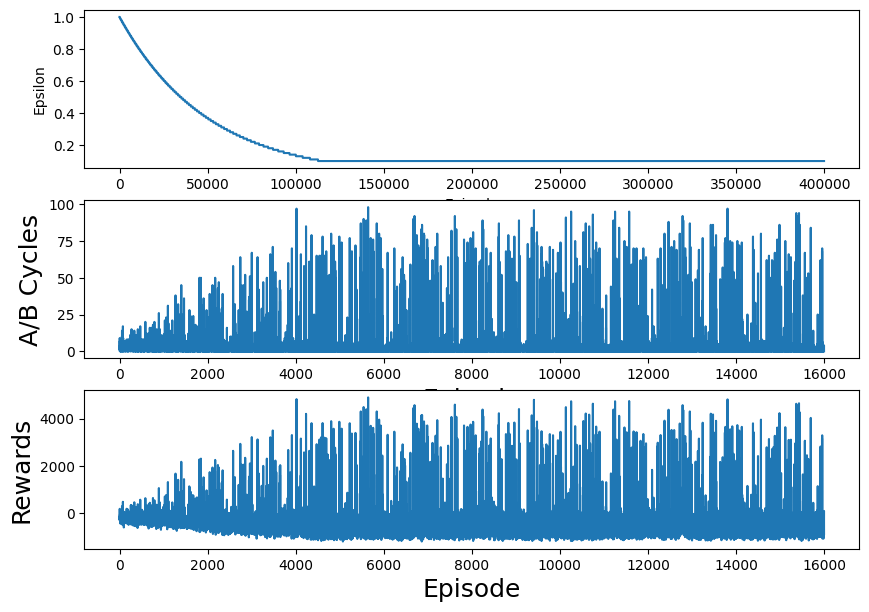

In [6]:
_, axs = plt.subplots(3, 1, figsize = (10,7))

axs[0].set_xlabel("Episode", fontsize=10)
axs[0].set_ylabel("Epsilon", fontsize=10)
axs[0].plot(np.array(movingAverage(epsilon_lst, 100)))

axs[1].plot(np.array(cycles_lst))
axs[1].set_xlabel("Episode",fontsize=18)
axs[1].set_ylabel("A/B Cycles",fontsize=18)

axs[2].set_xlabel("Episode", fontsize=18)
axs[2].set_ylabel("Rewards", fontsize=18)
axs[2].plot(np.array(rewards_lst))



In [7]:
def test_once(loc_a, loc_b, display=True):

    global q_table

    n = 5
    m = 5

    max_steps = 25

    # 1st agent always begins at B
    agents = init_agents(4, loc_a, loc_b)

    gw = GridWorld(n, m, loc_a, loc_b, agents)

    focal_agent_idx = 0

    states_ = [gw.get_np_state_for_agent(agent).reshape(1, statespace_size) for agent in agents]

    states = []

    for state in states_:
        states.append(tuple(state.tolist()[0]))

    if display:
        print("initial state:")
        gw.display()
        print("focal agent is", agents[focal_agent_idx].id)

    for s in range( (len(agents)*25) + 1 ):

        for idx in range(len(agents)):

            qval = q_table[states[idx]]

            action_ = np.argmax(qval)
            action = action_set[action_]

            rew = gw.attempt_action_for_agent(agents[idx], action)

            if display:
                print(f"agent {agents[idx].id} took action {action} and got rewarded {rew}")
                print(gw.display())
            
            state = gw.get_np_state_for_agent(agents[idx]).reshape(1, statespace_size)
            states[idx] = tuple( state.tolist()[0] )
        
        # whichever if condition is met first will return
        if (agents[focal_agent_idx].num_steps > max_steps):
            if display:
                print("test unsuccessful - too many steps")
            return False
        
        # if (agents[focal_agent_idx].num_collisions > 0):
        #     if display:
        #         print("test unsuccessful - focal agent collided with an agent of the opposite type")
        #     return False

        if (agents[focal_agent_idx].reached_a):
            if display:
                print(f"test success - focal agent {agents[focal_agent_idx].id} reached A without collisions in under 25 steps")
            return True

    # ideally this line must never execute - if conditions should handle everything
    return False

loc_a = ( rd.randint(0,4), rd.randint(0,4) )
loc_b = ( rd.randint(0,4), rd.randint(0,4) )

# loc_a = (0,3)
# loc_b = (3,4)

test_once(loc_a, loc_b, True)

initial state:
 ----------------
|                |
|                |
|           B    |
|                |
|              A |
 ----------------
* followed by a number indicates the presence of a number of agents in that cell.
agents at A and B are not indicated.

agents in the grid:
1 (2, 3) False | 3 (2, 3) False | 2 (4, 4) True | 4 (4, 4) True | 
focal agent is 1
agent 1 took action s and got rewarded -1
 ----------------
|                |
|                |
|           B    |
|          *1    |
|              A |
 ----------------
* followed by a number indicates the presence of a number of agents in that cell.
agents at A and B are not indicated.

agents in the grid:
3 (2, 3) False | 1 (3, 3) False | 2 (4, 4) True | 4 (4, 4) True | 
None
agent 2 took action w and got rewarded -1
 ----------------
|                |
|                |
|           B    |
|          *1    |
|          *1  A |
 ----------------
* followed by a number indicates the presence of a number of agents in t

True

In [8]:
def test_stats():
  max_games = 1000
  wins = 0
  for i in range(max_games):
      
    loc_a = ( rd.randint(0,4), rd.randint(0,4) )
    loc_b = ( rd.randint(0,4), rd.randint(0,4) )

    win = test_once(loc_a, loc_b, display=False)
    if win:
      wins += 1

  win_perc = float(wins) / float(max_games)
  print("Games played: {0}, # of wins: {1}".format(max_games,wins))
  print("Win percentage: {}".format(win_perc))


test_stats()

Games played: 1000, # of wins: 169
Win percentage: 0.169
